# Import

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
import itertools
import matplotlib.pyplot as plt

In [2]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    tensor = torch.LongTensor(idxs)
    return Variable(tensor)

In [3]:
CONTEXT_SIZE = 4  # 2 words to the left, 2 to the right
EMBEDDING_DIM = 4500
LEARNING_RATE = 0.001
EPOCHS = 100

In [4]:
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

In [5]:
trigrams = [([raw_text[i], raw_text[i + 1], raw_text[i + 2], raw_text[i + 3]], raw_text[i + 2])
            for i in range(len(raw_text) - 4)]

In [6]:
vocab = set(raw_text)
vocab_size = len(vocab)

In [7]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


In [8]:
class CBOW(nn.Module):
    global intermediaire
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 64)
        self.linear2 = nn.Linear(64, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        intermediaire = out
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs
    

In [9]:
loss_function = nn.NLLLoss()

In [100]:
model = CBOW(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [101]:
courbe_apprentissage = []

In [102]:
for epoch in range(EPOCHS):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_idxs = [word_to_ix[w] for w in context]
        context_var = Variable(torch.LongTensor(context_idxs))

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    courbe_apprentissage.append(total_loss)

/Users/ppx/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


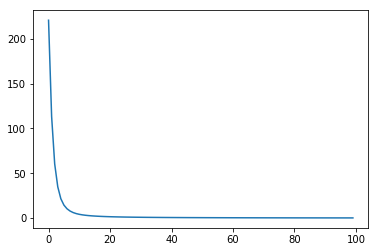

In [103]:
plt.plot(courbe_apprentissage)
plt.show()

In [104]:
courbe_apprentissage[-1]


 0.2401
[torch.FloatTensor of size 1]

In [105]:
context_var

Variable containing:
 40
 37
 21
 13
[torch.LongTensor of size 4]

In [108]:
lolo = model(Variable(torch.LongTensor([1,2,3,4])))

/Users/ppx/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [116]:
loss = loss_function(lolo, Variable(
            torch.LongTensor([word_to_ix['data.']])))

In [117]:
lolo

Variable containing:

Columns 0 to 9 
-6.1871 -4.5681 -4.7636 -1.9886 -4.8791 -6.8418 -6.4438 -5.1992 -7.3156 -4.9472

Columns 10 to 19 
-4.8338 -6.5393 -4.7779 -7.1557 -4.8266 -5.8855 -3.5777 -2.6375 -6.7238 -6.1792

Columns 20 to 29 
-4.1606 -5.4338 -4.6953 -7.0794 -7.3901 -5.9422 -6.1656 -6.1227 -5.0742 -5.4529

Columns 30 to 39 
-6.9456 -5.2449 -1.1402 -4.9332 -7.3816 -5.2458 -4.4749 -2.0492 -6.0436 -3.3535

Columns 40 to 48 
-6.7605 -5.6078 -5.1385 -5.3530 -3.8456 -5.1770 -5.1194 -4.1853 -2.8450
[torch.FloatTensor of size 1x49]

In [118]:
target

'with'